In [1]:
# Imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

49.502491687458416


c:\users\johan\onedrive - university of copenhagen\8. semester\kreditrisiko\python\venv\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


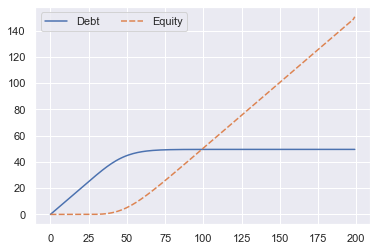

In [2]:

import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()
import pandas as pd


def bs_call(v, D, T, r, sigma):
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / D) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call = (v * si.norm.cdf(d1, 0.0, 1.0) - D * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))

    return call

def merton_equity(v, d, sigma, r, t,T):
    """
    v - Value of firm
    d - ZCB value
    sigma - volatility
    r - riskfree interest rate
    T - Last period
    t - current period
    """
    period = T-t

    d1 = (np.log(v / d) + (0.5 * sigma ** 2) * period + r * period) / (sigma * np.sqrt(period))
    d2 = d1 - sigma * np.sqrt(period)

    equity = (v * si.norm.cdf(d1, 0.0, 1.0) - d * np.exp(-r * period) * si.norm.cdf(d2, 0.0, 1.0))

    return equity

def merton_debt(v, d, sigma, r, t, T):
    debt = v - merton_equity(v, d, sigma, r, t, T)

    return debt


print(merton_debt(180, 50, 0.025, 0.01, 0, 1))


import numpy as np
import pandas as pd

df = pd.DataFrame(data=np.linspace(0, 200, 200,  dtype=int), columns=['V'] )

param = {
            "v": 180,
            "Ds": 50,
            "Dj": 50,
            "r": 0.01,
            "sigma": 0.25,
            "T": 1
        }

df['B'] = merton_debt(df['V'], 50, 0.25, 0.01, 0, 1)

df['S'] = merton_equity(df['V'], 50, 0.25, 0.01, 0, 1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.lineplot(data=[df['B'],df['S']])
plt.legend(['Debt','Equity'], ncol=2, loc='upper left')

plt.show()



In [3]:
# Parameters
V = 180
D = 50
r = 0.01
σ = 0.25
T = 10

In [4]:
# Time to maturity
dt = 1/1000
tau = np.arange(dt, T+dt, dt)

In [5]:


# Normal CDF
N = lambda x: stats.norm.cdf(x)



In [6]:
# Black-Scholes Call price
def C_BS(V, K, T):
    d1 = (np.log(V/K) + (r + 0.5*σ**2)*T ) / ( σ*np.sqrt(T) )
    d2 = d1 - σ*np.sqrt(T)
    return V*N(d1) - np.exp(-r*T)*K*N(d2)

# Senior Debt Call Price
def C_Ks(V, Ks, T):
    d1 = (np.log(V/Ks) + (r + 0.5*σ**2)*T ) / ( σ*np.sqrt(T) )
    d2 = d1 - σ*np.sqrt(T)
    return V*N(d1) - np.exp(-r*T)*Ks*N(d2)
# Junior Debt Call price
def C_Kj(V, Ks, Kj, T):
    d1 = (np.log(V/(Ks+Kj)) + (r + 0.5*σ**2)*T ) / ( σ*np.sqrt(T) )
    d2 = d1 - σ*np.sqrt(T)
    return V*N(d1) - np.exp(-r*T)*(Ks+Kj)*N(d2)






In [7]:
# Yield spreads (bps)
s = lambda Model: 10000 * (np.log(D/Model) / tau - r)

In [8]:
# Coordinates for plotting
x = tau


y_senior_low = s((V-90) - C_Ks((V-90), D, tau))
y_senior_high = s(V - C_Ks(V, D, tau))
y_junior_low = s(C_Ks((V-90), D, tau) - C_Kj((V-90),D , D, tau))
y_junior_high= s(C_Ks(V, D, tau) - C_Kj(V,D , D, tau))

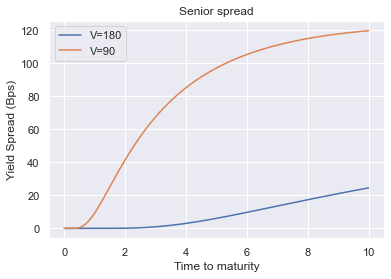

In [9]:
sns.lineplot(x=x, y=y_senior_high, label='V=180')
sns.lineplot(x=x, y=y_senior_low, label='V=90')
# plt.plot(x, y_senior_high, label='V=180')
# plt.plot(x, y_senior_low, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Senior spread')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(0, 200)
plt.show()

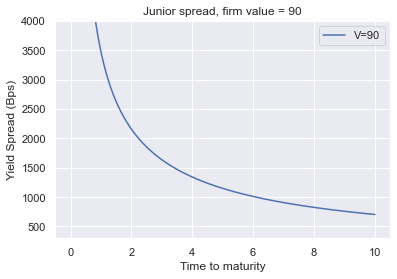

In [10]:
sns.lineplot(x=x, y=y_junior_low, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 90')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
plt.ylim(300, 4000)
plt.show()


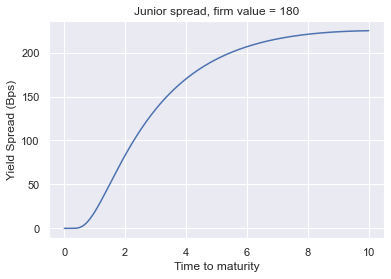

In [11]:
plt.plot(x, y_junior_high)
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 180')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(y_junior_high.max()-20, y_junior_high.max()+20)
plt.show()

test =s(C_Ks(90, 50, 10) - C_Kj(90,50 , 50, 10))

#

#### Merton with a jump

Now we introduce the idea of having jumps

In [12]:
import numpy as np

V = 100
sigma = 0.20
r = 0.0
q = 0
λ = 0.1
k = np.log(0.8)
γ = np.log(0.8)
δ = np.sqrt(0.1)
T= 1
Dj=50
Ds=50

λ_prime = λ*(1+k)

In [13]:
# Poisson CDF
P = lambda x, k: stats.poisson.pmf(x, k)

In [14]:
import pandas as pd
df = pd.DataFrame

def C_BS_jump(T, V, D):

    n = 0
    n_list = []
    p_list = []
    BS_list = []

    Poisson_prob = P(n, λ_prime*T)


    while round(Poisson_prob,4) > 0:
        Poisson_prob = P(n, λ_prime*T)

        vol_n = (sigma**2+n*0.1/1)**.5

        r_n = r - λ* k + n *np.log(1+k)/T

        d1 = np.log(V/(np.exp(-r_n*T)*D))/(vol_n*np.sqrt(T))+(1/2)*vol_n*np.sqrt(T)

        BS = np.exp(-q*T)*V*N(d1)-np.exp(-r_n*T)*D*N(d1-vol_n*np.sqrt(T))

        n_list.append(n)
        p_list.append(Poisson_prob)
        BS_list.append(BS)

        sumproduct = sum(x * y for x, y in zip(p_list, BS_list))



        n += 1

        if n == 50:
            break

    return sumproduct


In [15]:

def merton_equity_jump(V, D, T):
    return C_BS_jump(T, V, D)

def merton_debt_jump(V, D, T):
    debt = V - merton_equity_jump(V, D, T)

    return debt


c:\users\johan\onedrive - university of copenhagen\8. semester\kreditrisiko\python\venv\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


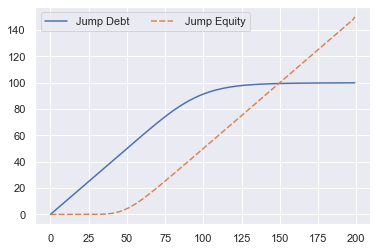

In [16]:
import numpy as np
import pandas as pd

df2 = pd.DataFrame(data=np.linspace(0, 200, 200,  dtype=int), columns=['V'] )

df2['B_jump'] = merton_debt_jump(df2['V'], 100, 1)

df2['S_jump'] = merton_equity_jump(df2['V'], 50, 1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.lineplot(data=[df2['B_jump'],df2['S_jump']])
plt.legend(['Jump Debt',' Jump Equity'], ncol=2, loc='upper left')

plt.show()

In [17]:
# Black-Scholes Call price
import pandas as pd
df = pd.DataFrame

def C_BS_jump_subOrdinatedDebt(T, V, D):

    n = 0
    n_list = []
    p_list = []
    BS_list = []

    Poisson_prob = P(n, λ_prime*T)


    while round(Poisson_prob,4) > 0:
        Poisson_prob = P(n, λ_prime*T)

        vol_n = (sigma**2+n*0.1/1)**.5

        r_n = r - λ* k + n *np.log(1+k)/T

        d1 = np.log(V/(np.exp(-r_n*T)*D))/(vol_n*np.sqrt(T))+(1/2)*vol_n*np.sqrt(T)

        BS = np.exp(-q*T)*V*N(d1)-np.exp(-r_n*T)*D*N(d1-vol_n*np.sqrt(T))

        n_list.append(n)
        p_list.append(Poisson_prob)
        BS_list.append(BS)

        sumproduct = sum(x * y for x, y in zip(p_list, BS_list))



        n += 1

        if n == 50:
            break

    return sumproduct



def C_BS_jump_Ds(T, V, Ds):

    n = 0
    n_list = []
    p_list = []
    BS_list = []

    Poisson_prob = P(n, λ_prime*T)


    while round(Poisson_prob,4) > 0:
        Poisson_prob = P(n, λ_prime*T)

        vol_n = (sigma**2+n*0.1/1)**.5

        r_n = r - λ* k + n *np.log(1+k)/T

        d1 = np.log(V/(np.exp(-r_n*T)*Ds))/(vol_n*np.sqrt(T))+(1/2)*vol_n*np.sqrt(T)

        BS = np.exp(-q*T)*V*N(d1)-np.exp(-r_n*T)*Ds*N(d1-vol_n*np.sqrt(T))

        n_list.append(n)
        p_list.append(Poisson_prob)
        BS_list.append(BS)

        sumproduct = sum(x * y for x, y in zip(p_list, BS_list))



        n += 1

        if n == 50:
            break

    return sumproduct

def C_BS_jump_Dj(T, V, Ds, Dj):

    n = 0
    n_list = []
    p_list = []
    BS_list = []

    Poisson_prob = P(n, λ_prime*T)


    while round(Poisson_prob,4) > 0:
        Poisson_prob = P(n, λ_prime*T)

        vol_n = (sigma**2+n*0.1/1)**.5

        r_n = r - λ* k + n *np.log(1+k)/T

        d1 = np.log(V/(np.exp(-r_n*T)*(Ds+Dj)))/(vol_n*np.sqrt(T))+(1/2)*vol_n*np.sqrt(T)

        BS = np.exp(-q*T)*V*N(d1)-np.exp(-r_n*T)*(Ds+Dj)*N(d1-vol_n*np.sqrt(T))

        n_list.append(n)
        p_list.append(Poisson_prob)
        BS_list.append(BS)

        sumproduct = sum(x * y for x, y in zip(p_list, BS_list))



        n += 1

        if n == 50:
            break

    return sumproduct


In [21]:
x = tau
#
V = 180
y_senior_low_jump = s((V-90)-C_BS_jump_Ds(T, (V-90),Ds))
y_senior_high_jump = s(V - C_BS_jump(T, V, 50))

y_junior_low_jump = s(C_BS_jump(T, (V-90), 50) - C_BS_jump(T, (V-90), 100))
y_junior_high_jump = s(C_BS_jump(T, V, 50) - C_BS_jump(T, V, 100))
#
#
#

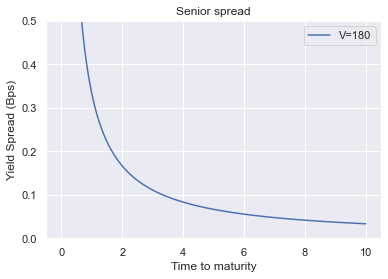

In [31]:
sns.lineplot(x=x, y=y_senior_high_jump, label='V=180')
# sns.lineplot(x=x, y=y_senior_low_jump, label='V=90')
# plt.plot(x, y_senior_high, label='V=180')
# plt.plot(x, y_senior_low, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Senior spread')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
plt.ylim(0, .5)
plt.show()

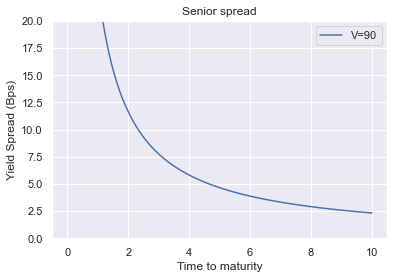

In [35]:

# sns.lineplot(x=x, y=y_senior_high_jump, label='V=180')
sns.lineplot(x=x, y=y_senior_low_jump, label='V=90')
# plt.plot(x, y_senior_high, label='V=180')
# plt.plot(x, y_senior_low, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Senior spread')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
plt.ylim(0, 20)
plt.show()

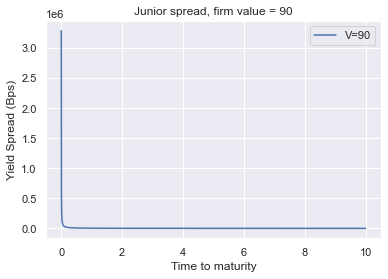

In [36]:
sns.lineplot(x=x, y=y_junior_low_jump, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 90')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(300, 4000)
plt.show()


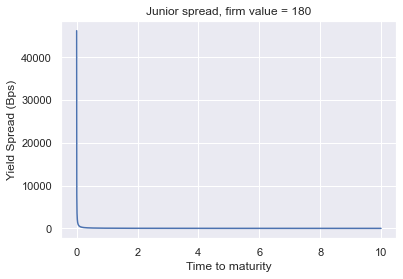

In [37]:
plt.plot(x, y_junior_high_jump)
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 180')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(y_junior_high.max()-20, y_junior_high.max()+20)
plt.show()

# test =s(C_Ks(90, 50, 10) - C_Kj(90,50 , 50, 10))

#



In [ ]:
x = tau
#
k = np.log(0.9)
V = 130
jump_130_1 = s(C_BS_jump(T, V, 100))
V= 150
jump_150_1 = s(C_BS_jump(T, V, 100))
V= 200
jump_200_1 = s(C_BS_jump(T, V, 100))


k = np.log(0.5)
V = 130
jump_130_2 = s(C_BS_jump(T, V, 100))
V= 150
jump_150_2= s(C_BS_jump(T, V, 100))
V= 200
jump_200_2 = s(C_BS_jump(T, V, 100))

k = np.log(0.5)
V = 130
jump_130_3 = s(C_BS_jump(T, V, 100))
V= 150
jump_150_3= s(C_BS_jump(T, V, 100))
V= 200
jump_200_3 = s(C_BS_jump(T, V, 100))








